In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import time
import re

In [2]:
episode_list = []
ratings_list = []
for i in range(6):
    time.sleep(1)
    url = 'https://www.imdb.com/search/title/?series=tt0206512&sort=release_date,asc&start={}&ref_=adv_nxt'.format(50*i + 1)
    

    page = requests.get(url)

    soup = BeautifulSoup(page.content, 'html.parser')

    # get a list of descriptions
    ratings = soup.find_all("div",{"class": "col-imdb-rating"})

    #add ratings to list
    if i < 5:
        for j in range(50):
            ratings_list.append(float(re.search(
            'data-value="(.*)" name',
            str(soup.find_all("div",{"class": "ratings-bar"})[j])    
            ).group(1)))
            episodes = soup.select("div.lister-item small + a[href]")
        for episode in episodes:
            episode_list.append(episode.text)


    elif i == 5:
        for j in range(15):
            ratings_list.append(float(re.search(
            'data-value="(.*)" name',
            str(soup.find_all("div",{"class": "ratings-bar"})[j])    
            ).group(1)))

        episodes = soup.select("div.lister-item small + a[href]")
        for episode in episodes[:15]:
            episode_list.append(episode.text)


    
    

In [9]:
# generate a list of episodes per 30 minute showing 
episodes_per_showing = [x.count('/') + 1 for x in episode_list]

# now use that to separate the 30-minute segments into individual ratings
full_ratings = []
for i in range(len(episodes_per_showing)):
    full_ratings.append([ratings_list[i]]*episodes_per_showing[i])
full_ratings = [item for sublist in full_ratings for item in sublist]

# get all episodes in a list
full_episodes = [
    item for sublist in [x.split('/') for x in episode_list] for item in sublist
    ]


In [10]:
sponge_df = pd.DataFrame({
    "Title":full_episodes,
    "Rating": full_ratings}
    )
sponge_df.index.name='Episode #'
sponge_df

,Title,Rating
Episode #,,
0,Help Wanted,8.7
1,Reef Blower,8.7
2,Tea at the Treedome,8.7
3,BubbleStand,8.5
4,Ripped Pants,8.5
...,...,...
500,Biddy Sitting,7.1
501,Lighthouse Louie,6.8
502,Hiccup Plague,6.8


In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

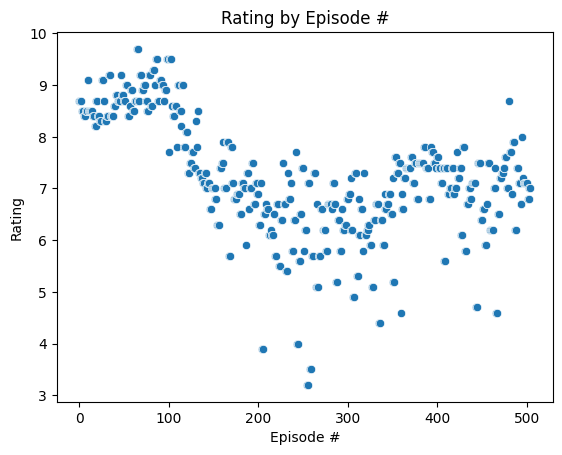

In [225]:
sns.scatterplot(
    data = sponge_df,
    x = 'Episode #',
    y = 'Rating')
plt.title('Rating by Episode #')
plt.show()


In [12]:
# export to csv file to use in merger notebook
sponge_df.to_csv('sponge_df.csv')